### [방법1] 판다스의 read_sql_query
- 속도느릴수 있음

In [91]:
####################
## 판다스로 읽을때
###################
import pandas as pd
import sqlite3

base_dir='c:/users/hrpark/desktop/bu_sql/'
conn = sqlite3.connect(base_dir+'eCommerce.db', isolation_level=None)
query="SELECT * FROM 담당자"
df=pd.read_sql_query(query,conn)
display(df)
#conn.close()

,담당자id,담당자이름,email,phone,website
0,1,홍길동,길동@naver.com,010-0000-0000,Kim.com
1,2,Park,Park@naver.com,010-1111-1111,Park.com
2,3,Lee,Lee@naver.com,010-2222-2222,Lee.com
3,4,Cho,Cho@naver.com,010-3333-3333,Cho.com
4,5,Yoo,Yoo@naver.com,010-4444-4444,Yoo.com


### [미션] 다음과 같이 출력하는 query문 작성
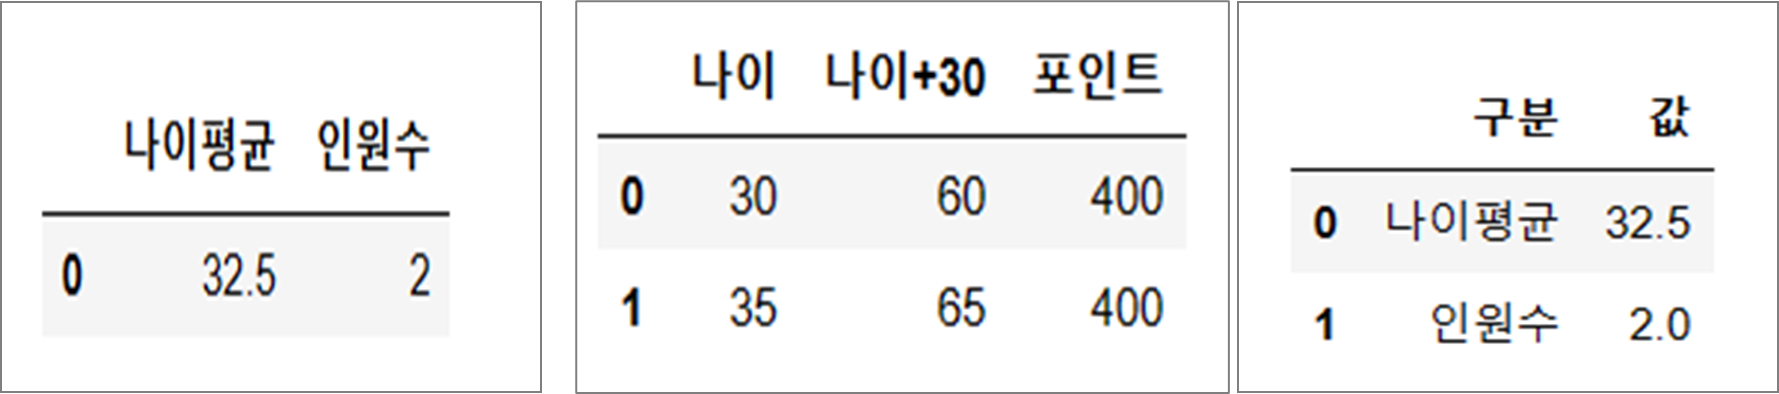

### [미션] 아래와 같이 출력될수 있도록query 작성
- 고객의 담당자 이름과 전화번호 출력
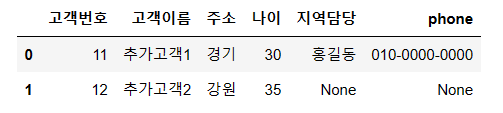

### [방법2] 커서연결기법
- 데이터베이스 연결 객체인 conn으로부터 커서 객체를 생성하여  SQL 쿼리를 실행하고 결과를 가져옴

In [89]:
import sqlite3

base_dir='c:/users/hrpark/desktop/bu_sql/'
conn = sqlite3.connect(base_dir+'eCommerce.db', isolation_level=None)

c = conn.cursor() # 커서 바인딩
c.execute("SELECT * FROM 담당자") # 데이터 조회(전체)

In [92]:
# 커서 위치가 변경 된다.
# 1개 로우 선택
print('One -> \n', c.fetchone())


One -> 
 (2, 'Park', 'Park@naver.com', '010-1111-1111', 'Park.com')


In [32]:

# 지정 로우 선택
print('Three -> \n', c.fetchmany(size=3))



Three -> 
 [(2, 'Park', 'Park@naver.com', '010-1111-1111', 'Park.com'), (3, 'Lee', 'Lee@naver.com', '010-2222-2222', 'Lee.com'), (4, 'Cho', 'Cho@naver.com', '010-3333-3333', 'Cho.com')]


In [33]:
# 전체 로우 선택
print('All -> \n', c.fetchall())
print()


All -> 
 [(5, 'Yoo', 'Yoo@naver.com', '010-4444-4444', 'Yoo.com')]



In [34]:
# 순회1
rows = c.fetchall()
for row in rows:
    print('retrieve1  >', row)  # 조회 없음


In [35]:
# 순회2
for row in c.fetchall():
    print('retrieve2 >', row)  # 조회 없음


In [36]:
# 순회3
for row in c.execute("SELECT * FROM 담당자 ORDER BY 담당자id desc"):
    print('retrieve3 > ', row)

print()



retrieve3 >  (5, 'Yoo', 'Yoo@naver.com', '010-4444-4444', 'Yoo.com')
retrieve3 >  (4, 'Cho', 'Cho@naver.com', '010-3333-3333', 'Cho.com')
retrieve3 >  (3, 'Lee', 'Lee@naver.com', '010-2222-2222', 'Lee.com')
retrieve3 >  (2, 'Park', 'Park@naver.com', '010-1111-1111', 'Park.com')
retrieve3 >  (1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com')



In [37]:

# WHERE Retrieve2
param2 = 1
c.execute("SELECT * FROM 담당자 WHERE 담당자id='%s'" % param2)  # %s %d %f
print('param2', c.fetchone())
print('param2', c.fetchall())

param2 (1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com')
param2 []


In [21]:
# WHERE Retrieve3
c.execute("SELECT * FROM 담당자 WHERE 담당자id= :담당자Id", {"담당자Id": 1})
print('param3', c.fetchone())
print('param3', c.fetchall())


param3 (1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com')
param3 []


In [15]:
# WHERE Retrieve4
param4 = (1, 4)
c.execute('SELECT * FROM 담당자 WHERE 담당자id IN(?,?)', param4)
print('param4', c.fetchall())

param4 [(1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com'), (4, 'Cho', 'Cho@naver.com', '010-3333-3333', 'Cho.com')]


In [14]:
# WHERE Retrieve5
c.execute("SELECT * FROM 담당자 WHERE 담당자id In('%d','%d')" % (1, 4))
print('param5', c.fetchall())

param5 [(1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com'), (4, 'Cho', 'Cho@naver.com', '010-3333-3333', 'Cho.com')]


In [13]:
# WHERE Retrieve5
c.execute("SELECT * FROM 담당자 WHERE 담당자id In('%d','%d')" % (1, 4))
print('param5', c.fetchall())

param5 [(1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com'), (4, 'Cho', 'Cho@naver.com', '010-3333-3333', 'Cho.com')]


In [39]:

################################################################
###  명령어 백업용, 어려움. 전문적으로 할 사람들만 추후에 확인함
################################################################
# WHERE Retrieve6
c.execute("SELECT * FROM 담당자 WHERE 담당자id= :담당자id1 OR 담당자id= :담당자id2", {"담당자id1": 1, "담당자id2": 4})
print('param6', c.fetchall())

with conn:
    # Dump 출력(데이터베이스 백업 시 중요)
    with open(base_dir+'dump.sql', 'w') as f:
        for line in conn.iterdump():
            f.write('%s\n' % line)
        print('Dump Print Complete.')


param6 [(1, '홍길동', '길동@naver.com', '010-0000-0000', 'Kim.com'), (4, 'Cho', 'Cho@naver.com', '010-3333-3333', 'Cho.com')]
Dump Print Complete.
